# Esercitazione 7

## Punto 2

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def autocorrelation(v, size):
    autoc = np.zeros(size)
    l = v.size - size
    mu1 = np.mean(v[:l])
    musq = np.mean(v[:l]**2)
    var = musq - mu1**2
    
    for i in range(size):
        mu2 = np.mean(v[i:l+i])
        mu12 = np.mean(v[:l]*v[i:l+i])
        
        autoc[i] = (mu12- (mu1*mu2))/var
        
    return autoc

#stima dell'errore
def error(sum, sum2, n):
    if(n==0): return 0
    else: return np.sqrt((sum2-(sum**2))/n)

def sigma(r,N):

    L = int(r.size/N)
    ave = 0
    av2 = 0

    for i in range(N):
        sum = 0

        for j in range(L):
            k = j+(i*L)
            sum += r[k]

        ave += sum/L
        av2 += (sum/L)**2

    ave /= N
    av2 /= N
    return error(ave, av2, N-1)


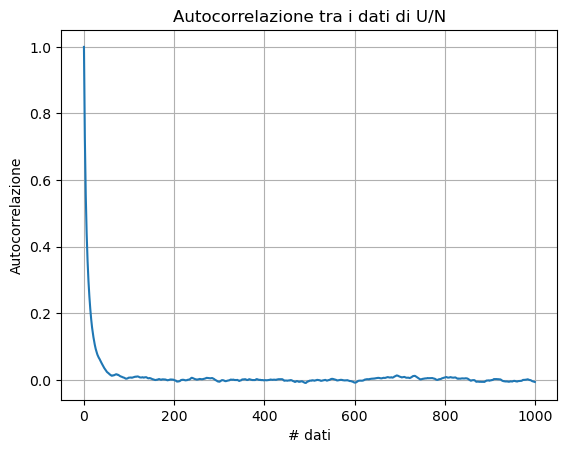

[0.0003232215504445804, 0.00037320500165832326, 0.00039623167370049256, 0.00041901974901201216, 0.00044290566333063754, 0.0004633703726950096, 0.0004800519582891987, 0.000509655838760367, 0.0005238665341498626, 0.0005299909398035783, 0.0005404437407017133, 0.0005470790711084501, 0.0005527361818681558, 0.0005579561893894748, 0.0005602216429446723, 0.000560933709846406, 0.0005627956396064073, 0.0005727459544160999, 0.0005722288813797492, 0.0005609869139691507, 0.0005426617709179734, 0.0005817807380928317, 0.0005596657597968655, 0.000503161455512587]


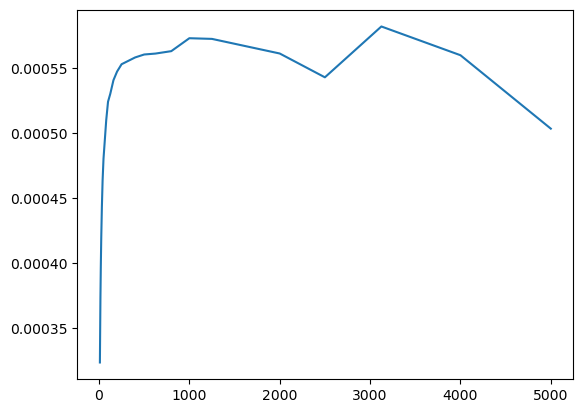

In [7]:
solid_epot = np.loadtxt("risultati/Autocorrelazione/Solid/output_epot.dat", usecols=(1), unpack='true')

solid_autoc = autocorrelation(solid_epot, 1000)

plt.plot(solid_autoc)
plt.title("Autocorrelazione tra i dati di U/N")
plt.xlabel("# dati")
plt.ylabel("Autocorrelazione")
plt.grid(True)
plt.show()

L = np.array([x for x in range(10,5001) if (500000%x ==0)])
blocchi = 5*10**5 // L #integers

y = []

for i in range(blocchi.size):
    y.append(sigma(solid_epot, blocchi[i]))


print(y)

plt.plot(L,y)
plt.show()

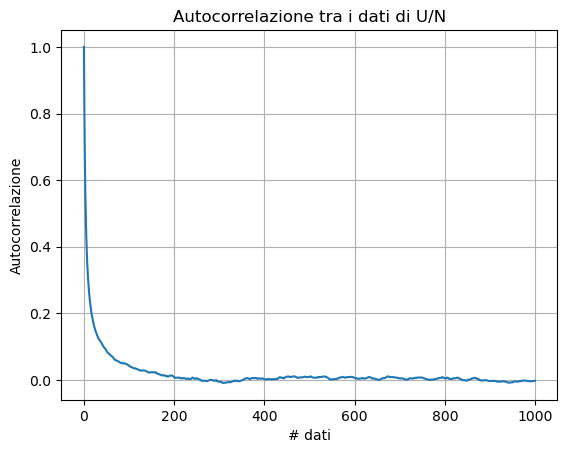

[0.00034102971784398284, 0.00039505804248234197, 0.0004213998717727458, 0.00044759046051126203, 0.00047784495797336025, 0.0005042384900844169, 0.0005343753308240545, 0.0005893384496834315, 0.0006193928549979631, 0.0006477882938422527, 0.0006741434492076417, 0.0006988543261758408, 0.0007209594552493191, 0.0007446213949279775, 0.0007644839642296495, 0.0007518580525683939, 0.000787915039527276, 0.0008144648776493681, 0.0007744825797323191, 0.0008109019799567246, 0.0007998364515943237, 0.0008224126454366754, 0.0007998339074908243, 0.0007952268309354049]


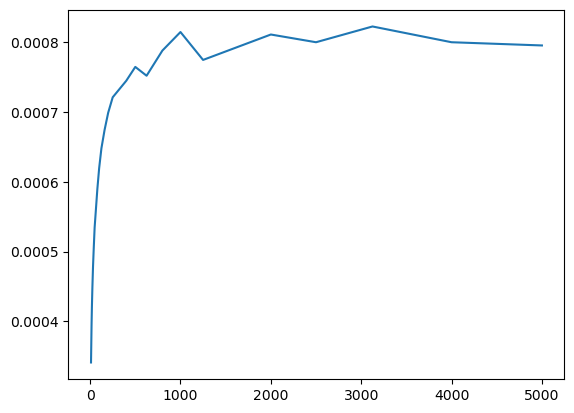

In [8]:
solid_epot = np.loadtxt("risultati/Autocorrelazione/Liquid/output_epot.dat", usecols=(1), unpack='true')

solid_autoc = autocorrelation(solid_epot, 1000)

plt.plot(solid_autoc)
plt.title("Autocorrelazione tra i dati di U/N")
plt.xlabel("# dati")
plt.ylabel("Autocorrelazione")
plt.grid(True)
plt.show()


y = []

for i in range(blocchi.size):
    y.append(sigma(solid_epot, blocchi[i]))


print(y)

plt.plot(L,y)
plt.show()

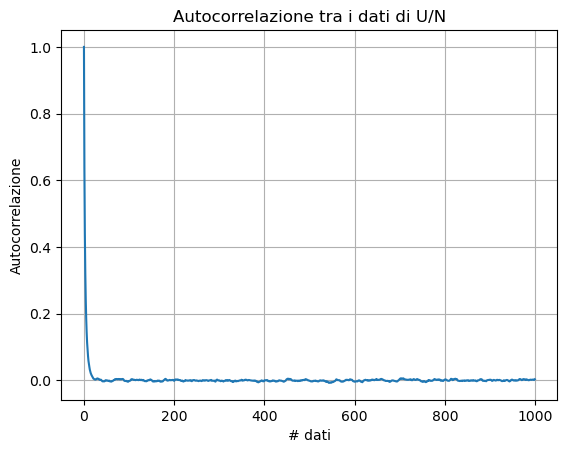

[0.00014691022811896194, 0.00015879714909417962, 0.00016382508849530566, 0.00016692882673592093, 0.00017014526714972285, 0.00017278888580269107, 0.0001756803184550192, 0.0001772021587418966, 0.00017826800485489842, 0.00018065642042037295, 0.00017855111227438428, 0.0001820678822928251, 0.0001806352995650566, 0.00018063800645290833, 0.00018742812643469177, 0.00018009689147165908, 0.00018028944261589403, 0.00018215440899193992, 0.00018012287801794454, 0.0001877275568353546, 0.00018522731677454488, 0.00018118824552297344, 0.00019940219151599368, 0.00018590543109281963]


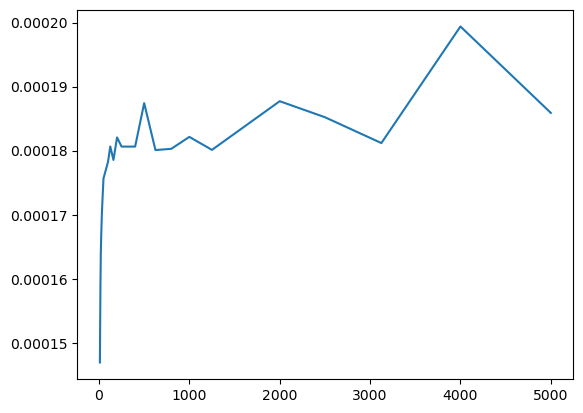

In [9]:
solid_epot = np.loadtxt("risultati/Autocorrelazione/Gas/output_epot.dat", usecols=(1), unpack='true')

solid_autoc = autocorrelation(solid_epot, 1000)

plt.plot(solid_autoc)
plt.title("Autocorrelazione tra i dati di U/N")
plt.xlabel("# dati")
plt.ylabel("Autocorrelazione")
plt.grid(True)
plt.show()


y = []

for i in range(blocchi.size):
    y.append(sigma(solid_epot, blocchi[i]))


print(y)

plt.plot(L,y)
plt.show()

In [10]:


# def error(average, average_of_squares, num_data_points):
#     if num_data_points == 0:
#         return 0
#     else:
#         return np.sqrt((average_of_squares - average**2) / num_data_points)

# def sigma(data, num_blocks):
#     block_size = int(data.size / num_blocks)
#     running_sum = 0
#     running_sum_of_squares = 0

#     for i in range(num_blocks):
#         block_data = data[i * block_size : (i + 1) * block_size]
#         block_average = np.mean(block_data)
#         running_sum += block_average
#         running_sum_of_squares += block_average**2

#     average_over_blocks = running_sum / num_blocks
#     average_over_blocks_of_squares = running_sum_of_squares / num_blocks

#     return error(average_over_blocks, average_over_blocks_of_squares, num_blocks - 1)



## Punto 4

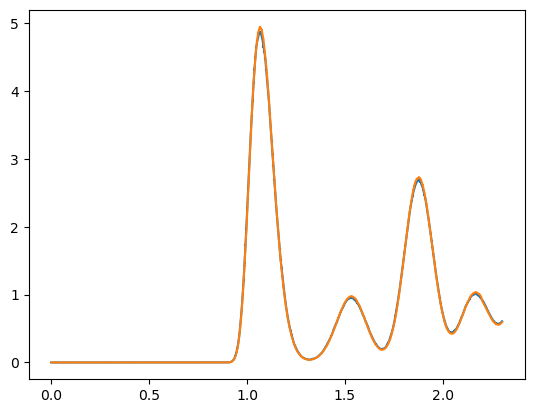

In [15]:
x, sum, err = np.loadtxt("risultati/Solid/output_gfinal", usecols=(0,1,2), unpack='true')
x2, sum2, err2 = np.loadtxt("risultati/NVE/output_gfinal.dat", usecols=(0,1,2), unpack='true')

plt.errorbar(x2, sum2, yerr=err2)
plt.errorbar(x, sum, yerr=err)
plt.show()
